<a href="https://colab.research.google.com/github/joaopasini/letscode_repository/blob/main/Projetos/Projeto_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício prático

Utilize o dataset de predição de câncer de pele para prever se a pinta/mancha é benigna ou maligna

https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign 

- Utilize a rede VGG16 como modelo pré-treinado e adicione algumas camadas no topo.
- Utilize o ImageDataGenerator com o preprocess_input do VGG16.

In [5]:
# Utilizando API do Kaggle para usar no Colab
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [7]:
# Baixando o dataset do Kaggle para o Colab
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 321M/325M [00:02<00:00, 160MB/s]
100% 325M/325M [00:02<00:00, 127MB/s]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# # Mudando a chave API para privada
! chmod 600 /content/kaggle.json

In [10]:
# fazendo o unzip do arquivo
! unzip skin-cancer-malignant-vs-benign.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  

In [19]:
# excluindo dataset duplicado (diretorio data)
# ! rm -r data

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# Predição usando um modelo pré-treinado
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt

In [14]:
# load da imagem
image = load_img('1.jpg', target_size=(224, 224))
print(type(image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [15]:
image = img_to_array(image)
print(type(image))

<class 'numpy.ndarray'>


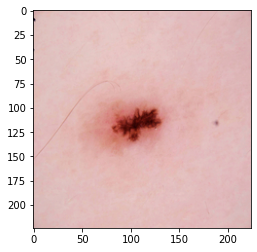

In [16]:
plt.imshow(image.astype(int))
plt.show()

In [17]:
image.shape

(224, 224, 3)

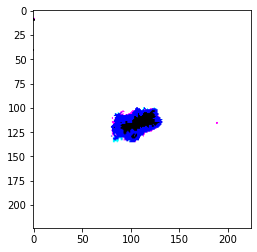

In [18]:
image_ = preprocess_input(image)
plt.imshow(image_)
plt.show()

In [19]:
# shape=(None, 224, 224, 3)
image_ = image_.reshape((1, image_.shape[0], image_.shape[1], image_.shape[2]))
print(image_.shape)

(1, 224, 224, 3)


In [20]:
y_pred = model.predict(image_)

In [21]:
y_pred.shape

(1, 1000)

In [22]:
label= decode_predictions(y_pred)
label 

49152/35363 [=========================================] - 0s 1us/step


[[('n01776313', 'tick', 0.9114283),
  ('n02219486', 'ant', 0.018103803),
  ('n01775062', 'wolf_spider', 0.016874084),
  ('n02233338', 'cockroach', 0.009069394),
  ('n01773549', 'barn_spider', 0.0056872396)]]

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from tensorflow.keras.models import Model
from pickle import dump

image = load_img('1.jpg', target_size=(224, 224))
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [26]:
model_ = VGG16()

In [27]:
# acessando as layers utilizando o método layers
model_.layers

In [28]:
model_.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
model_.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>]

In [30]:
model_ = Model(inputs=model_.inputs, outputs=model_.layers[-4].output)

In [31]:
features = model_.predict(image)

In [32]:
features.shape

(1, 25088)

In [33]:
# pegando as features de camadas anteriores e plotando a saída
model_ = VGG16()
# remove the output layer
model_ = Model(inputs=model_.inputs, outputs=model_.layers[-14].output)
# get extracted features
features = model_.predict(image)
print(features.shape)

(1, 56, 56, 256)


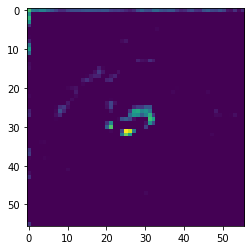

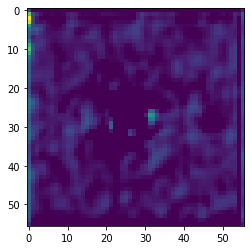

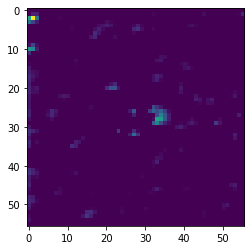

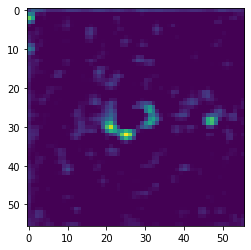

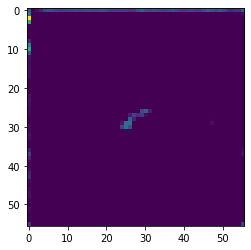

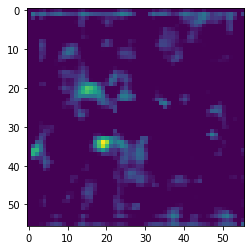

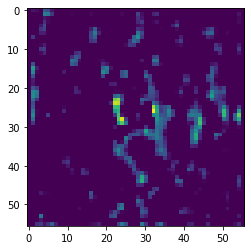

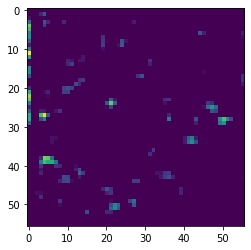

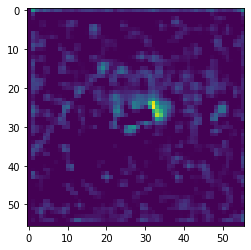

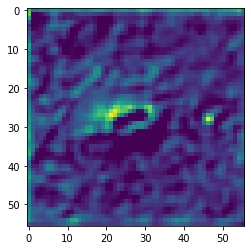

In [34]:
# 10 primeiros filtros
for i in range(0,10):
    plt.imshow(features[0,:,:,i].astype(int))
    plt.show()

Iniciando a construção do modelo:

Instancia um modelo base com todos os pesos e remove o classificador do modelo utilizando o parâmetro `include_top=False`.

In [35]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pretreined_model = VGG16(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
    )
pretreined_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

A última camada de features tem shape (4, 4, 512) sobre o qual adicionameros um classificador densamente conectado.

In [36]:
model = Sequential()
model.add(pretreined_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


O VGG16 foi adicionado no modelo como se fosse uma camada.

Congela os pesos do modelo base para não serem treinados:

In [37]:
pretreined_model.trainable = False

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Data Augmentation


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    os.path.join('train'),
    target_size=(150, 150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join('test'),
    target_size=(150, 150),
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/2
83/83 [==============================] - 671s 8s/step - loss: 0.6565 - accuracy: 0.7254 - val_loss: 0.4575 - val_accuracy: 0.7773
Epoch 2/2
27/83 [========>.....................] - ETA: 5:50 - loss: 0.4804 - accuracy: 0.7740

In [ ]:
# salvando os parâmetros e a estrutura do modelo com o método save
model.save('transfer_learning_model.h5')

In [ ]:
# Exemplo de como as imagens ficam após o Data Augmentation
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()